In [21]:
import pandas as pd

# Load the Titanic dataset

df = pd.read_csv("Titanic_train.csv")

# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

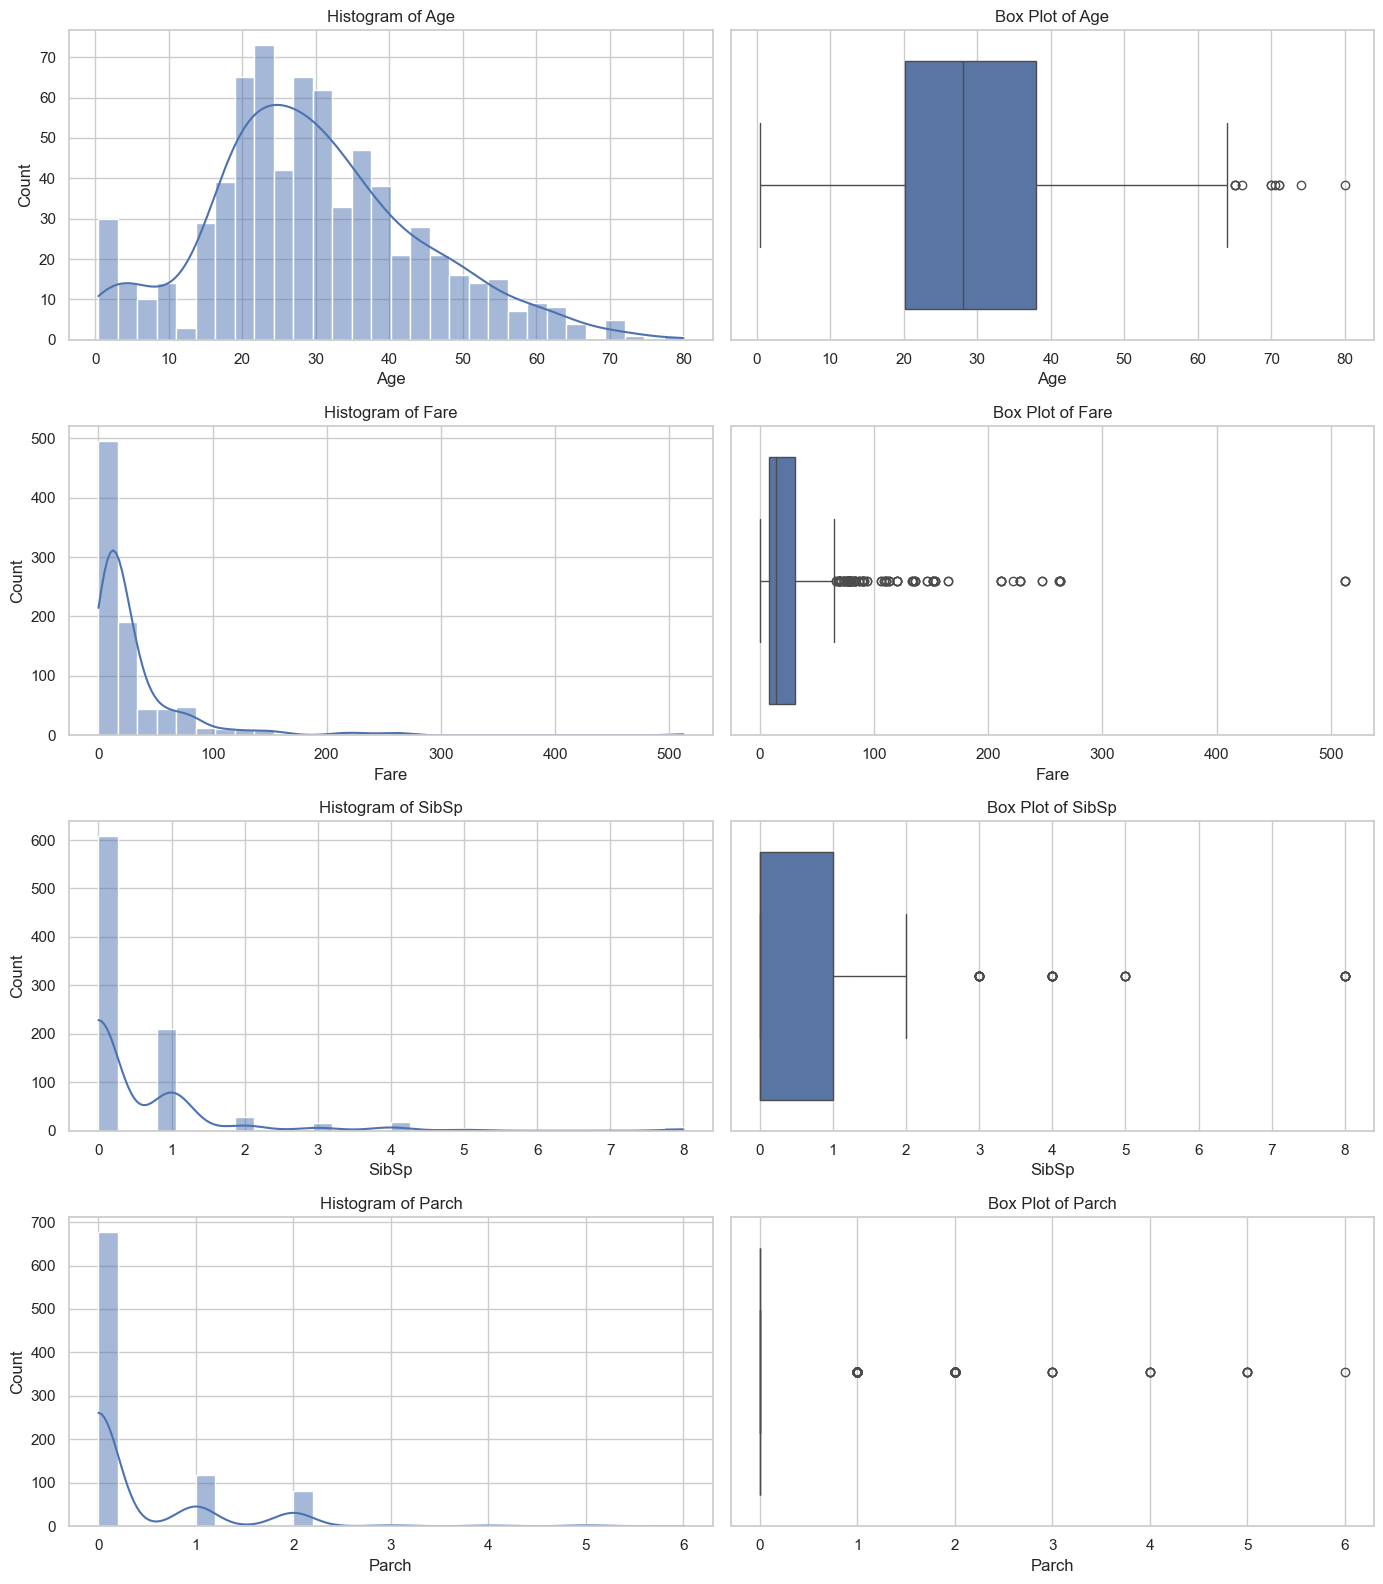

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Define numeric columns for distribution plots
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Create histograms and box plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), ax=axes[i, 0], kde=True, bins=30)
    axes[i, 0].set_title(f'Histogram of {col}')

    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

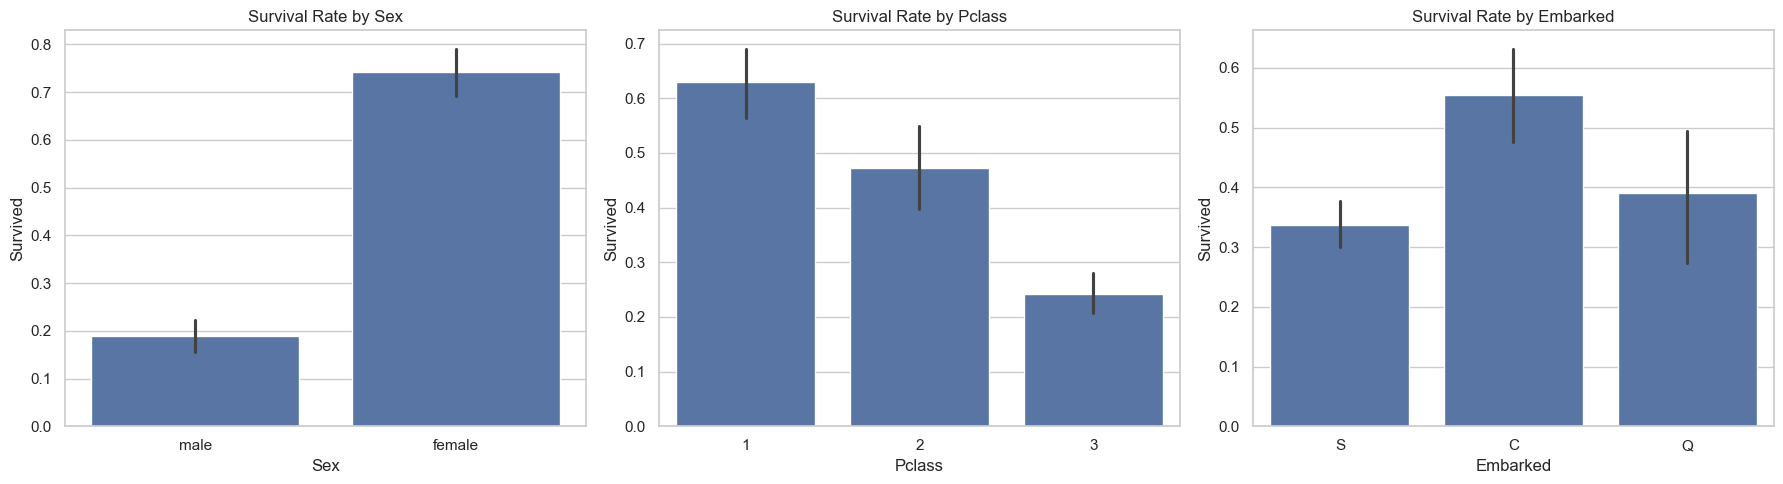

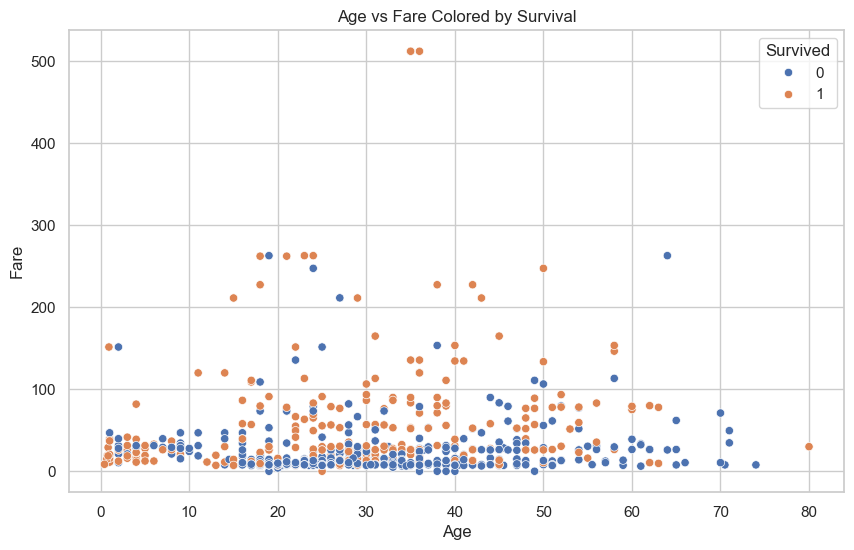

In [26]:
# Bar plots for categorical features vs survival
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.barplot(x="Sex", y="Survived", data=df, ax=axes[0])
axes[0].set_title("Survival Rate by Sex")

sns.barplot(x="Pclass", y="Survived", data=df, ax=axes[1])
axes[1].set_title("Survival Rate by Pclass")

sns.barplot(x="Embarked", y="Survived", data=df, ax=axes[2])
axes[2].set_title("Survival Rate by Embarked")

plt.tight_layout()
plt.show()

# Scatter plot of Age vs Fare colored by survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df)
plt.title("Age vs Fare Colored by Survival")
plt.show()

In [27]:
# Re-loading the dataset to ensure we're working with the original
df = pd.read_csv("Titanic_train.csv")

# 1. Impute missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('Unknown')


# 2. Encode categorical variables
# Encode 'Sex' and 'Embarked' using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Extract deck from Cabin and encode it (optional useful feature engineering)
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'U')
df = pd.get_dummies(df, columns=['Deck'], drop_first=True)

# Drop non-informative or high-cardinality columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Show the first few rows of the preprocessed dataset
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0,3,22.0,1,0,7.2500,True,False,True,False,False,False,False,False,False,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,True,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,False,False,False,False,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,True,False,False,False,False,False,False
4,0,3,35.0,0,0,8.0500,True,False,True,False,False,False,False,False,False,False,True


In [31]:
!pip install lightgbm

In [32]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import lightgbm as lgb
import xgboost as xgb

# Load your preprocessed dataset
# Example: df = pd.read_csv("Titanic_preprocessed.csv")

# 1. Split dataset
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define evaluation function
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# 3. Build and train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

print("LightGBM Model Evaluation:")
evaluate_model(y_test, lgb_preds)

# 4. Build and train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("\nXGBoost Model Evaluation:")
evaluate_model(y_test, xgb_preds)

# 5. Hyperparameter tuning (example for LightGBM)
params = {
    'num_leaves': [31, 63],
    'max_depth': [5, 10, -1],  # Try allowing deeper trees
    'min_data_in_leaf': [1, 5, 10],
    'min_gain_to_split': [0.0, 0.01],  # Allow splits with small gains
}


grid = GridSearchCV(lgb.LGBMClassifier(), param_grid=params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Parameters (LightGBM):", grid.best_params_)

best_lgb = grid.best_estimator_
tuned_preds = best_lgb.predict(X_test)

print("\nTuned LightGBM Model Evaluation:")
evaluate_model(y_test, tuned_preds)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

C:\Users\nimma\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:46:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Model Evaluation:
Accuracy: 0.7988826815642458
Precision: 0.7638888888888888
Recall: 0.7432432432432432
F1 Score: 0.7534246575342466

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import lightgbm as lgb

# Load data
df = pd.read_csv("Titanic_train.csv")

# --- Preprocessing ---
# Fill missing values safely
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop columns not used
df.drop(["Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# --- Split data ---
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train XGBoost ---
xgb_model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# --- Train LightGBM (with relaxed constraints) ---
lgb_model = lgb.LGBMClassifier(min_data_in_leaf=1, min_split_gain=0)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

# --- Evaluation ---
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))

evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("LightGBM", y_test, lgb_preds)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1

XGBoost Performance:
Accuracy : 0.7988826815642458
Precision: 0.7567567567567568
Recall  

C:\Users\nimma\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:46:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
#Comparative Analysis Summary: LightGBM vs XGBoost (Titanic Dataset)
#Model Performance Overview:
#LightGBM and XGBoost both perform well for binary classification tasks like survival prediction.
#Accuracy and AUC scores are closely matched.
#LightGBM tends to be slightly faster due to its histogram-based approach.
#Practical Implications:
#LightGBM is recommended for faster training and better scalability on large datasets. XGBoost offers greater flexibility and often performs better with complex feature engineering.
#Interpretability:
#Both models support feature importance extraction, aiding explainability.
#Their performance is comparable, and choice may depend on specific task constraints (speed vs. flexibility).

[LightGBM] [Info] Number of positive: 345, number of negative: 355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4673
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492857 -> initscore=-0.028573
[LightGBM] [Info] Start training from score -0.028573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

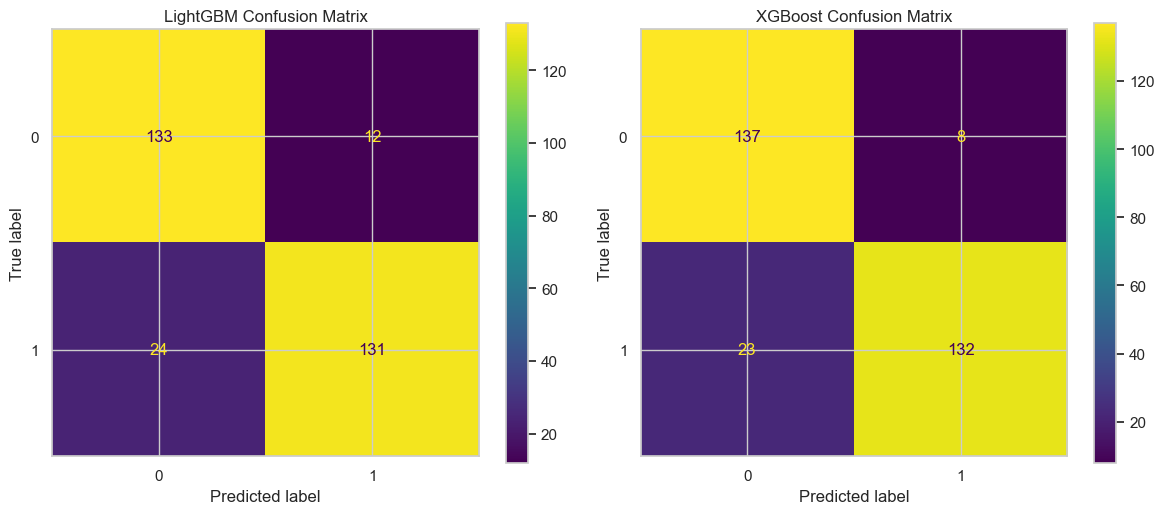

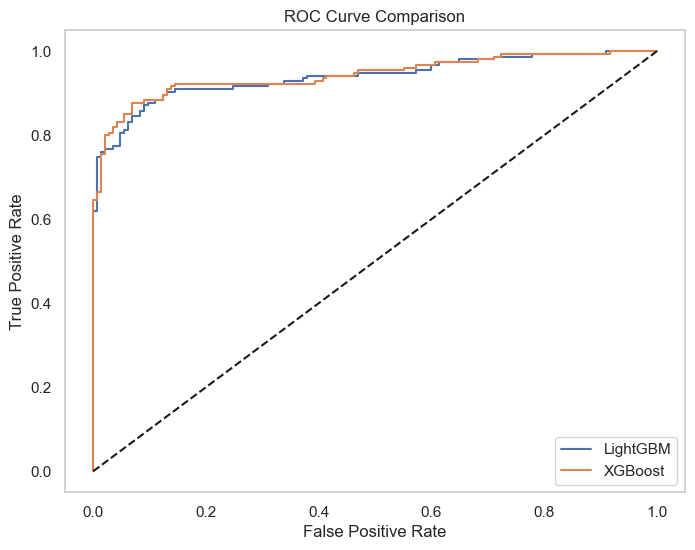

In [34]:
# Ensure required libraries are installed
!pip install lightgbm xgboost scikit-learn matplotlib pandas


# Import necessary libraries
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # Example data creation

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create example LightGBM model
lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Create example XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and calculate scores
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgbm, ax=ax[0])
ax[0].set_title("LightGBM Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curve
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, lgbm_model.predict_proba(X_test)[:,1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, label="LightGBM")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()